In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
dFrame = pd.read_csv("G:\Datasets\Social Network ads\Social_Network_Ads.csv")
df = dFrame
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
df.drop(["User ID"], axis=1, inplace=True)
df = pd.get_dummies(df, drop_first=True)
df.rename(columns={"Gender_Male":"gender", "Age":"age", "EstimatedSalary":"salary", "Purchased":"purchased"}, inplace=True)
df.head()

,age,salary,purchased,gender
0,19,19000,0,1
1,35,20000,0,1
2,26,43000,0,0
3,27,57000,0,0
4,19,76000,0,1


In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

              precision    recall  f1-score   support

           0       0.97      0.90      0.93        63
           1       0.85      0.95      0.90        37

    accuracy                           0.92       100
   macro avg       0.91      0.93      0.92       100
weighted avg       0.92      0.92      0.92       100

Accuracy: 92.00 %


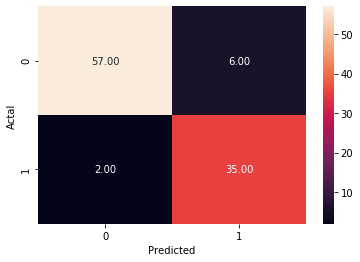

In [5]:
X = df.loc[:, df.columns != "purchased"].values
y = df.loc[:, df.columns == "purchased"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

model = DecisionTreeClassifier(criterion="entropy",min_samples_split=0.1,max_depth=3,max_features=2)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print (classification_report(y_test, y_pred))
print ("Accuracy: {:.2f} %".format(accuracy_score(y_test, y_pred) * 100))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='.2f')
plt.xlabel("Predicted")
plt.ylabel("Actal")
plt.show()

In [6]:
model.predict([[49,1,86000]])

array([1], dtype=int64)

# Max Depth

* This will tell you number of maximum nodes for the tree.
* Model generally overfits for large depth values.
* Genral Values are from 1 to 32 
* Eg: max_depth=5

# Minimum Sample Split
* Represents the minimum number of samples required to split an internal node.
* Vary the parameter from 10% to 100% of the samples
* min_samples_split=0.1


# Minimum Sample Leaf
* The minimum number of samples required to be at a leaf node.
* Generally goes from 0.1 to 0.5
* min_samples_leaf = 0.1

# Max features

*The number of features to consider when looking for the best split.
*max_features

In [7]:
batman = DecisionTreeClassifier(criterion="gini",min_samples_split=0.1,max_depth=3,max_features=2,random_state=2)


              precision    recall  f1-score   support

           0       0.97      0.90      0.93        63
           1       0.85      0.95      0.90        37

    accuracy                           0.92       100
   macro avg       0.91      0.93      0.92       100
weighted avg       0.92      0.92      0.92       100

Accuracy: 92.00 %


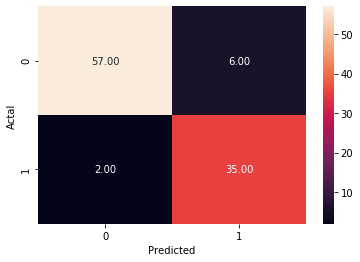

In [8]:
batman.fit(X_train, y_train)
y_pred = batman.predict(X_test)

print (classification_report(y_test, y_pred))
print ("Accuracy: {:.2f} %".format(accuracy_score(y_test, y_pred) * 100))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='.2f')
plt.xlabel("Predicted")
plt.ylabel("Actal")
plt.show()

In [9]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

C:\Users\Asus\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [10]:
dot_data = StringIO()
export_graphviz(batman, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  

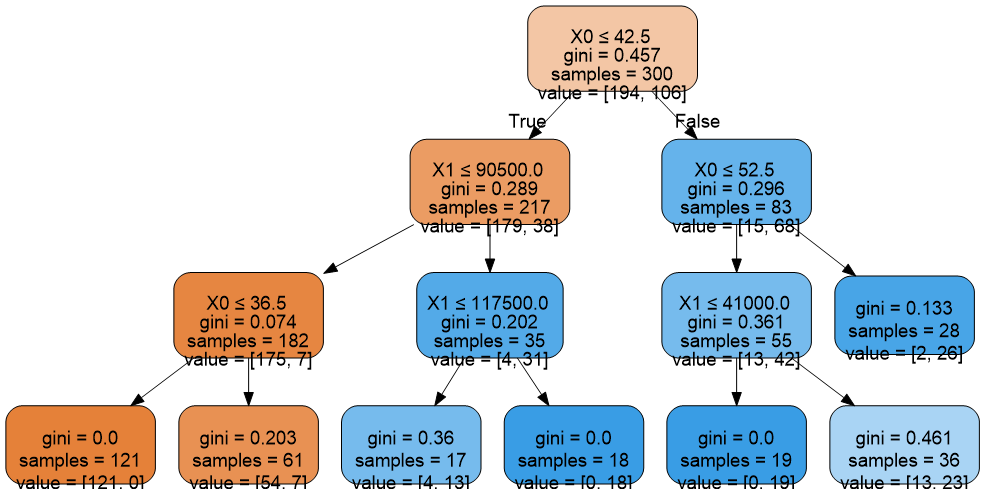

In [11]:
Image(graph.create_png())

In [92]:
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier()
knn.fit(X_train, y_train)

C:\Users\Asus\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [93]:
y_pred3 = knn.predict(X_test)


In [94]:
print (classification_report(y_test, y_pred3))
print ("Accuracy: {:.2f} %".format(accuracy_score(y_test, y_pred3) * 100))



              precision    recall  f1-score   support

           0       0.83      0.90      0.86        63
           1       0.81      0.68      0.74        37

    accuracy                           0.82       100
   macro avg       0.82      0.79      0.80       100
weighted avg       0.82      0.82      0.82       100

Accuracy: 82.00 %


In [112]:
l=[]
for i in range(1,200):
    l.append(i)
from sklearn.model_selection import GridSearchCV

param_dist = {"n_neighbors": l, "p":[1,2,3]}
cv_rf = GridSearchCV(knn, cv = 100,param_grid=param_dist)
cv_rf.fit(X_train, np.ravel(y_train))
print(cv_rf.best_params_)


{'n_neighbors': 15, 'p': 2}


C:\Users\Asus\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [113]:
knn=KNeighborsClassifier(n_neighbors= 15, p= 2)

In [114]:
knn.fit(X_train, y_train)

C:\Users\Asus\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                     weights='uniform')

In [118]:
cv_rf.best_score_

0.81

In [123]:
cv_rf.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                     weights='uniform')

In [115]:
y_pred5=knn.predict(X_test)

In [116]:
y_pred5=knn.predict(X_test)
print (classification_report(y_test, y_pred5))
print ("Accuracy: {:.2f} %".format(accuracy_score(y_test, y_pred5) * 100))
print()


              precision    recall  f1-score   support

           0       0.80      0.94      0.86        63
           1       0.85      0.59      0.70        37

    accuracy                           0.81       100
   macro avg       0.82      0.77      0.78       100
weighted avg       0.82      0.81      0.80       100

Accuracy: 81.00 %
